## Introduction


### Table of contents <br>
- Import Libraries
- Uploading Dataset
- Dataset exploration
- Analysis
    - The 10 most frequency jobs
    - Boxplots
    - Average salary of the 10 most frequent jobs
    - Frequency of Experience level of top 10 jobs
    - Average salary by expericience level of top 10 jobs
    - Top ten distribution of data by companu location

### Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Uploading dataset

In [2]:
try:
    file_path = 'salaries.csv'
    data_salaries = pd.read_csv(file_path)
except FileNotFoundError: 
    print ('No such file or directory. Check the file path')
else: 
    print ('successful upload!')
    

successful upload!


### Dataset exploration

##### 1. Dimension, columns, and total cells 

In [3]:
print ('Dimensions of dataset (rows x columns): ', data_salaries.shape, '\n')

print ('Total amount cells: ', data_salaries.size, '\n')

print ('Columns name: ', list(data_salaries.columns), '\n')


Dimensions of dataset (rows x columns):  (9005, 11) 

Total amount cells:  99055 

Columns name:  ['work_year', 'experience_level', 'employment_type', 'job_title', 'salary', 'salary_currency', 'salary_in_usd', 'employee_residence', 'remote_ratio', 'company_location', 'company_size'] 



##### 2. Info about columns

In [4]:
print ('Info about columns: \n\n')
data_salaries.info()

Info about columns: 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9005 entries, 0 to 9004
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9005 non-null   int64 
 1   experience_level    9005 non-null   object
 2   employment_type     9005 non-null   object
 3   job_title           9005 non-null   object
 4   salary              9005 non-null   int64 
 5   salary_currency     9005 non-null   object
 6   salary_in_usd       9005 non-null   int64 
 7   employee_residence  9005 non-null   object
 8   remote_ratio        9005 non-null   int64 
 9   company_location    9005 non-null   object
 10  company_size        9005 non-null   object
dtypes: int64(4), object(7)
memory usage: 774.0+ KB


> We can see that there aren't null values.

##### 3. Description general about dataset

In [5]:
print ('General description about numerical columns of dataset: \n\n', data_salaries.describe())

General description about numerical columns of dataset: 

          work_year        salary  salary_in_usd  remote_ratio
count  9005.000000  9.005000e+03    9005.000000   9005.000000
mean   2022.743254  1.741447e+05  149466.086619     38.600777
std       0.537819  4.510697e+05   63970.482789     48.054521
min    2020.000000  1.400000e+04   15000.000000      0.000000
25%    2023.000000  1.053800e+05  105000.000000      0.000000
50%    2023.000000  1.440000e+05  142200.000000      0.000000
75%    2023.000000  1.900000e+05  186000.000000    100.000000
max    2023.000000  3.040000e+07  450000.000000    100.000000


### Analysis dataset

How many different *jobs title* are there in the data set?

In [6]:
print ('There are:',len(data_salaries['job_title'].unique()), 'different jobs')

There are: 126 different jobs


In [7]:

data_salaries['job_title'].unique()


array(['Data Analyst', 'Data Scientist', 'Research Engineer',
       'Data Engineer', 'ML Engineer', 'Business Intelligence Engineer',
       'Research Analyst', 'Applied Scientist', 'Data Architect',
       'Machine Learning Engineer', 'Analytics Engineer', 'Head of Data',
       'Research Scientist', 'BI Analyst', 'Machine Learning Scientist',
       'Prompt Engineer', 'Data Management Analyst',
       'Business Intelligence Analyst', 'Machine Learning Modeler',
       'AI Engineer', 'Data Science Consultant', 'Data Science Director',
       'Data Specialist', 'Data Product Manager', 'BI Data Analyst',
       'Data Integration Engineer', 'BI Developer',
       'Business Intelligence Manager', 'Data Integration Specialist',
       'Data Science Practitioner', 'Business Intelligence Developer',
       'AI Research Engineer', 'Data Lead', 'Data Management Specialist',
       'AI Developer', 'Data Manager', 'AI Architect', 'MLOps Engineer',
       'Data Science Manager', 'Data Strategist

##### For this reason, we are going to focus on the 10 most frequent jobs

#### The 10 most frequent jobs

<Axes: title={'center': 'The 10 most frequency jobs'}, xlabel='Frequency'>

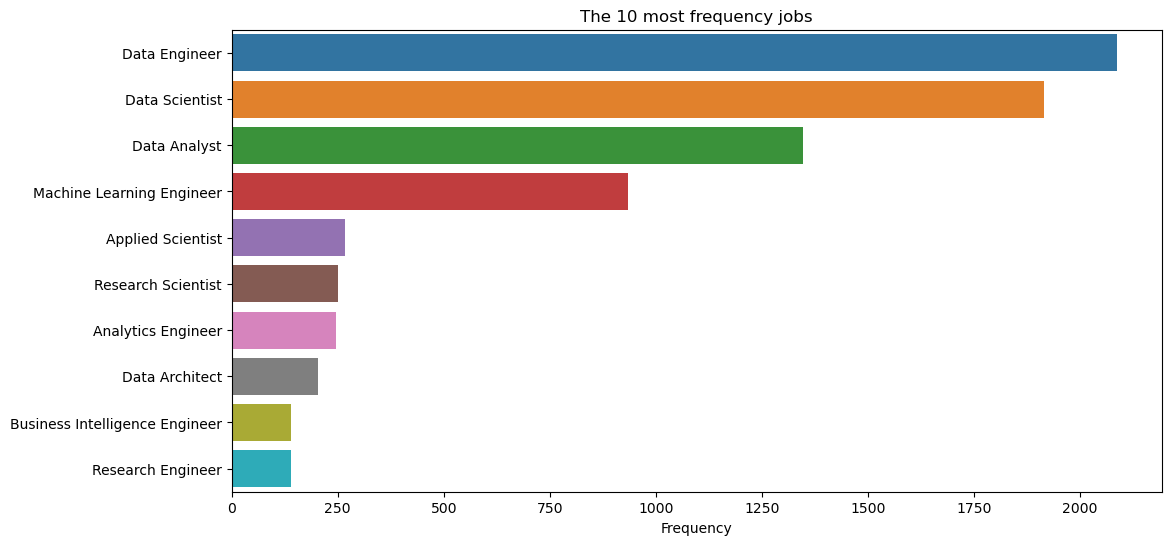

In [8]:
most_frequency_jobs = data_salaries['job_title'].value_counts().head(10)
plt.figure(figsize=(12,6))
plt.title('The 10 most frequency jobs')
plt.xlabel('Frequency')
sns.barplot(x=most_frequency_jobs.values, y=most_frequency_jobs.index)


In [9]:
print('The 10 most frequency jobs:\n')
print(most_frequency_jobs)

The 10 most frequency jobs:

Data Engineer                     2088
Data Scientist                    1915
Data Analyst                      1346
Machine Learning Engineer          934
Applied Scientist                  266
Research Scientist                 251
Analytics Engineer                 245
Data Architect                     203
Business Intelligence Engineer     140
Research Engineer                  139
Name: job_title, dtype: int64


Now, we are going to define a subset of the original dataset with only those rows that are in the list of the 10 most frequent jobs. 

In [10]:
subset_data_salaries = data_salaries[data_salaries['job_title'].isin(list(most_frequency_jobs.index))]
subset_data_salaries.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,MI,FT,Data Analyst,83000,USD,83000,US,100,US,M
1,2023,MI,FT,Data Analyst,66000,USD,66000,US,100,US,M
2,2023,SE,FT,Data Scientist,224250,USD,224250,US,0,US,M
3,2023,SE,FT,Data Scientist,121550,USD,121550,US,0,US,M
4,2023,MI,FT,Data Scientist,166000,USD,166000,US,0,US,M


#### Boxplot of salary

##### 1. Boxplot of salaries
This boxplot allows us to know the distribution of all salaries and if there are outliners.

Text(0.5, 1.0, 'Dstribution of salaries')

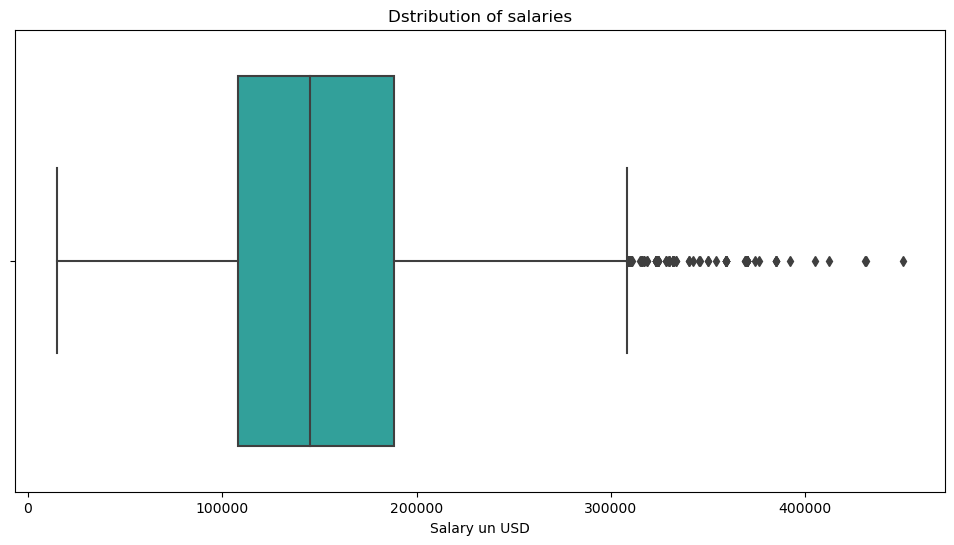

In [49]:
plt.figure(figsize=(12,6))
sns.boxplot(x=subset_data_salaries['salary_in_usd'], data=subset_data_salaries, color='#20B2AA')
plt.xlabel('Salary un USD')
plt.title('Dstribution of salaries')


>  The median is slightly to the left, so we can say that the distribution is positively skewed and there are several outliners. 
>

##### 2. Boxplot of salary by Experience Level
This box plot will show the distribution of salaries for each level of experience.

Experience Level: 
 EN = Entry Level/Junior
 MI = Intermediate
 SE = Senior
 EX = Director


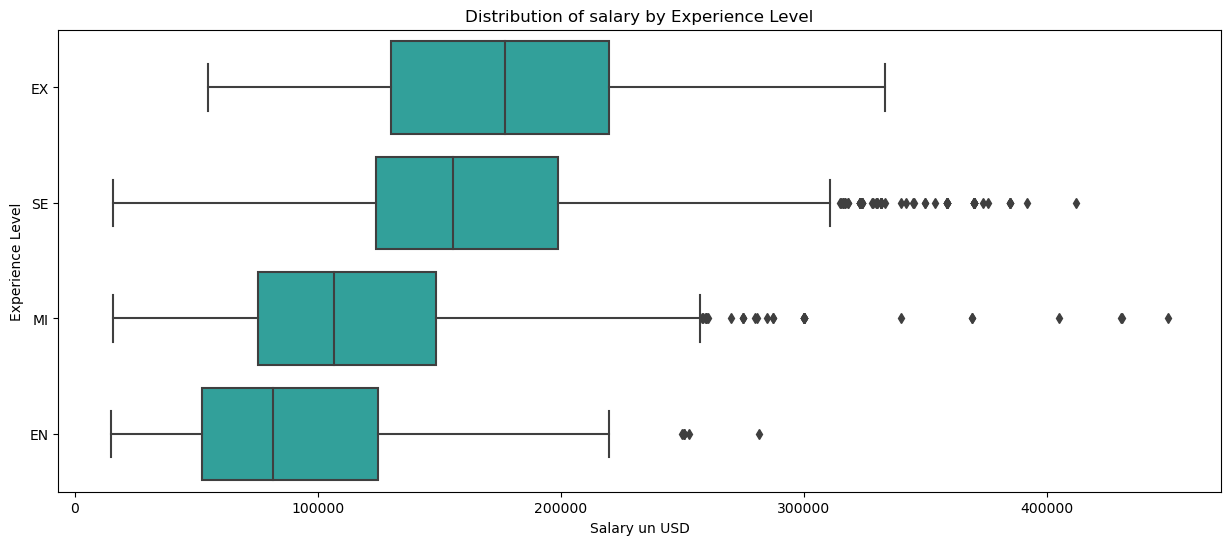

In [50]:
plt.figure(figsize=(15,6))
sns.boxplot(x=subset_data_salaries['salary_in_usd'], y= subset_data_salaries['experience_level'], data=subset_data_salaries, color='#20B2AA', order=['EX', 'SE', 'MI', 'EN'])
plt.xlabel('Salary un USD')
plt.ylabel('Experience Level')
plt.title('Distribution of salary by Experience Level')
print ('Experience Level: \n EN = Entry Level/Junior\n MI = Intermediate\n SE = Senior\n EX = Director' )

> We notice that in the case of EN, MI and SE experience level the median is slightly to the left (as is that general median). <br> The boxplot at EX experience level has a normal distribution. 

#### Average salary of the 10 most frequent jobs

/var/folders/5f/yflkgdd93pgb650cqwwbyqb40000gn/T/ipykernel_14858/686752471.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_salary = subset_data_salaries.groupby(['job_title']).mean().sort_values('salary_in_usd', ascending=False)


<Axes: title={'center': 'AVG salary of the 10 most frequent jobs'}, xlabel='salary_in_usd', ylabel='job_title'>

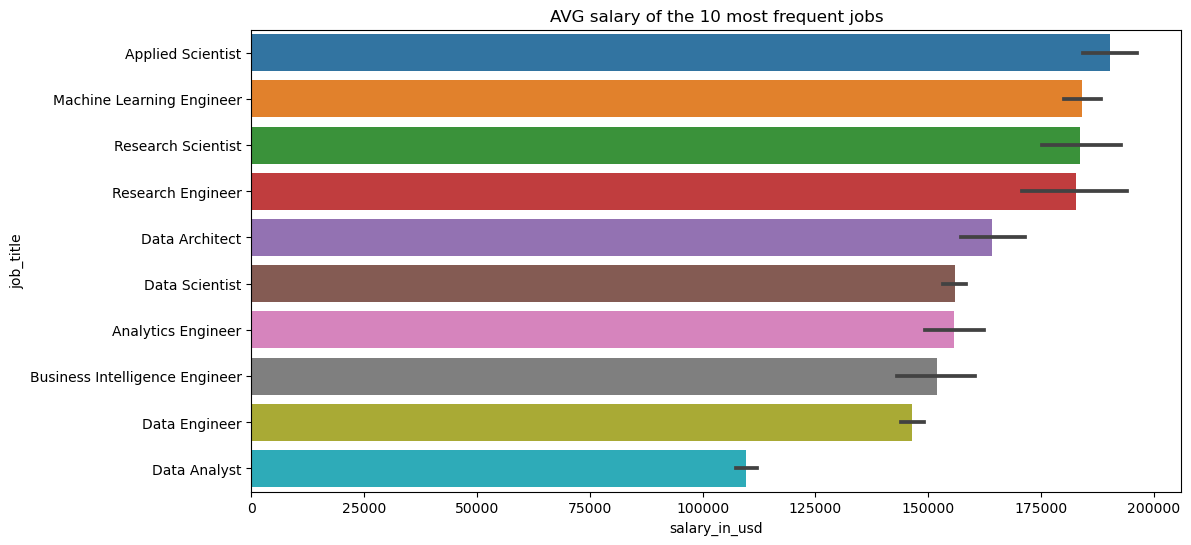

In [52]:
plt.figure(figsize=(12,6))
plt.title('AVG salary of the 10 most frequent jobs')
plt.xlabel('Salary in USD')
plt.ylabel('Job Title')
avg_salary = subset_data_salaries.groupby(['job_title']).mean().sort_values('salary_in_usd', ascending=False)
order = list((avg_salary).index)
sns.barplot(x=subset_data_salaries['salary_in_usd'], y=subset_data_salaries['job_title'], order=order)



In [26]:
avg_salary['salary_in_usd']

job_title
Applied Scientist                 190279.236842
Machine Learning Engineer         183992.186296
Research Scientist                183650.525896
Research Engineer                 182718.798561
Data Architect                    164237.394089
Data Scientist                    155901.303394
Analytics Engineer                155622.604082
Business Intelligence Engineer    151950.771429
Data Engineer                     146427.096743
Data Analyst                      109691.371471
Name: salary_in_usd, dtype: float64

#### Frequency of Experience level of top 10 jobs

Experience Level: 
 EN = Entry Level/Junior
 MI = Intermediate
 SE = Senior
 EX = Director


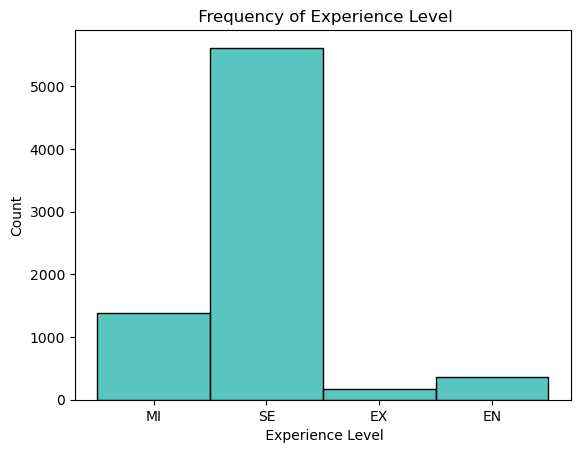

In [32]:
plt.xlabel(' Experience Level')
plt.title(' Frequency of Experience Level')
sns.histplot(subset_data_salaries['experience_level'], color = '#20B2AA')
print ('Experience Level: \n EN = Entry Level/Junior\n MI = Intermediate\n SE = Senior\n EX = Director' )

In [48]:
print ('Total rows in subset: ', len(subset_data_salaries))
print ('Count data per each level:' )
print (subset_data_salaries['experience_level'].value_counts())

Total rows in subset:  7527
Count data per each level:
SE    5613
MI    1384
EN     361
EX     169
Name: experience_level, dtype: int64


REVISAR
Most of the rows correspond to the senior level, this can raise the average salary in each job, which is why it seems appropriate to continue the analysis taking into account the different levels of experience.